In [1]:
!pip install transformers
!pip install torch torchvision torchaudio
!pip install pillow


In [2]:
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration


In [3]:
# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [15]:
from google.colab import files
uploaded = files.upload()

# Get the uploaded image filename
image_path = list(uploaded.keys())[0]


Saving 1260816604_570fc35836.jpg to 1260816604_570fc35836.jpg


In [16]:
raw_image = Image.open(image_path).convert('RGB')


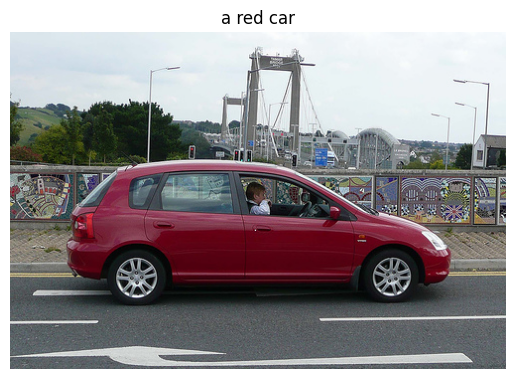

🗣️ AI Caption: a red car


In [17]:
# Prepare input
inputs = processor(images=raw_image, return_tensors="pt")

# Generate caption
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

# Show image and caption
import matplotlib.pyplot as plt
plt.imshow(raw_image)
plt.axis("off")
plt.title(caption)
plt.show()

print("🗣️ AI Caption:", caption)
